## <div align="center"> FINAL PROJECT IF540 MACHINE LEARNING </div>
### <div align="center"> Decision Tree Learning </div>

#### <div align="center"> Semester Genap 2022/2023 </div>


---

### Dataset yang dipakai:

1. Diabetes Health Indicators Dataset – sumber : https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset?resource=download
2. Data by Kuesioner

---

### <div align="center"> DECISION TREES LEARNING </div>

### Import Library
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

## <div align="center"> [Exploratory Data Analysis]  </div>
---

In [2]:
# Import & Read Dataset
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseorAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  HvyAlcoholConsump     67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GenHlth               67136 non-null  float64
 15  MentHlth           

In [3]:
# Display Dataset
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,1,11,5.0,6.0
67132,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,...,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,2.0
67133,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,...,1,1.0,2.0,10.0,0.0,0.0,1,8,6.0,6.0
67134,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,...,1,0.0,2.0,0.0,0.0,1.0,1,10,4.0,5.0


In [4]:
# Display Total Unique Value
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     79
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

In [5]:
# Data Shape
# (BEFORE - Drop Miss Values)
data.shape

(67136, 22)

In [6]:
# Calculation
correlation_matrix = data.corr()

# Sorting & Display by Print
highest_corr_features = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print(highest_corr_features)

Diabetes_binary         1.000000
GenHlth                 0.383091
HighBP                  0.373591
Age                     0.291909
HighChol                0.278599
BMI                     0.267604
DiffWalk                0.257696
HeartDiseaseorAttack    0.206995
PhysHlth                0.193755
CholCheck               0.123393
Stroke                  0.120238
Smoker                  0.082156
Sex                     0.053717
MentHlth                0.048857
AnyHealthcare           0.046204
NoDocbcCost             0.020921
Fruits                 -0.038621
Veggies                -0.065272
HvyAlcoholConsump      -0.096844
Education              -0.137252
PhysActivity           -0.197331
Income                 -0.214989
Name: Diabetes_binary, dtype: float64


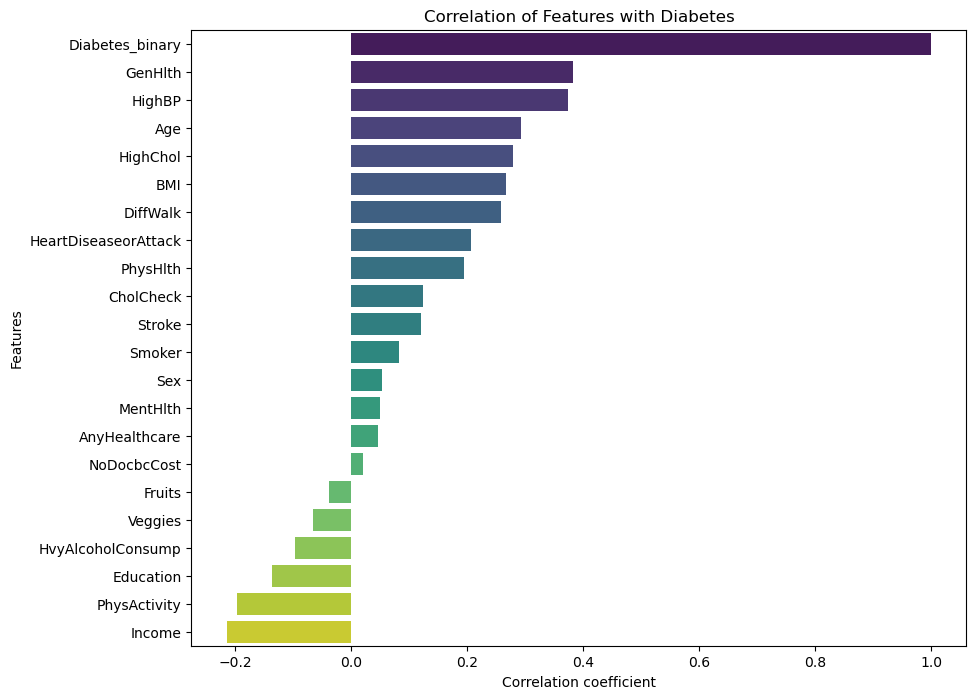

In [7]:
# Plotting Correlation of Features with Diabetes

plt.figure(figsize=(10, 8))
sns.barplot(x=highest_corr_features.values, y=highest_corr_features.index, palette="viridis")
plt.title('Correlation of Features with Diabetes')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

## VISUALIZATION
---

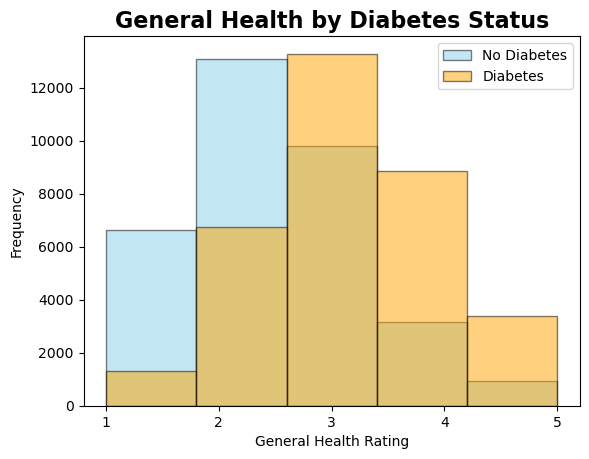

In [8]:
# Filter the dataset by Diabetes status
gen_health_no_diabetes = data[data["Diabetes_binary"] == False]["GenHlth"]
gen_health_with_diabetes = data[data["Diabetes_binary"] == True]["GenHlth"]

# Plot histograms with a different color (e.g., 'skyblue' for 'No Diabetes' and 'orange' for 'Diabetes')
plt.hist(gen_health_no_diabetes, bins=5, alpha=0.5, label="No Diabetes", edgecolor="black", color='skyblue')
plt.hist(gen_health_with_diabetes, bins=5, alpha=0.5, label="Diabetes", edgecolor="black", color='orange')

# Add legend
plt.legend()

# Add titles and labels as needed
plt.title("General Health by Diabetes Status", fontsize=16, fontweight='bold')  # Bold title, larger font size
plt.xlabel("General Health Rating")
plt.ylabel("Frequency")

# Set x-axis to display integer values from 1 to 5
plt.xticks(range(1, 6))

# Show the plot
plt.show()

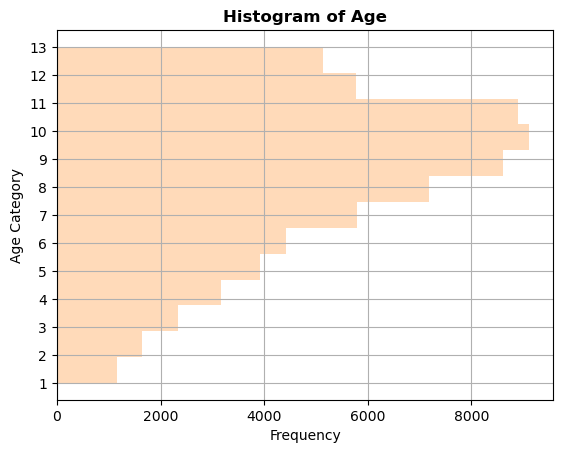

In [9]:
# Plot Age histogram with a pastel color
graph_histograms = data.hist(column="Age", grid=True, bins=13, color='#FFDAB9', orientation='horizontal')

# Calculate the tick positions for 13 bins
tick_positions = range(1, 14)

# Set the y-axis ticks for a vertical histogram
plt.yticks(tick_positions)

# Optionally, set x-axis and y-axis labels
plt.xlabel("Frequency")
plt.ylabel("Age Category")

# Bold the title
plt.title("Histogram of Age", fontweight='bold')

# Show the plot
plt.show()

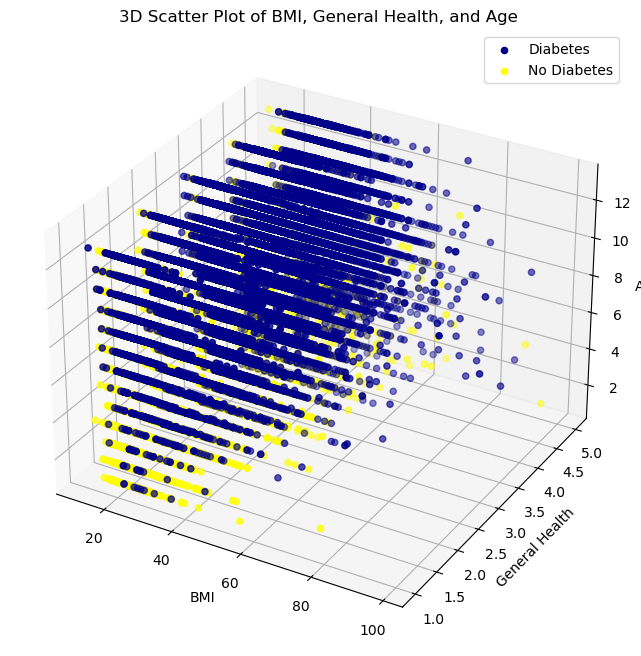

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Diabetes = 1
ax.scatter(data[data["Diabetes_binary"] == 1]['BMI'],
           data[data["Diabetes_binary"] == 1]['GenHlth'],
           data[data["Diabetes_binary"] == 1]['Age'],
           color='DarkBlue', label='Diabetes')

# Scatter plot for Diabetes = 0
ax.scatter(data[data["Diabetes_binary"] == 0]['BMI'],
           data[data["Diabetes_binary"] == 0]['GenHlth'],
           data[data["Diabetes_binary"] == 0]['Age'],
           color='Yellow', label='No Diabetes')

# Set labels and title
ax.set_xlabel('BMI')
ax.set_ylabel('General Health')
ax.set_zlabel('Age')
plt.title('3D Scatter Plot of BMI, General Health, and Age')

# Add legend
plt.legend()

# Show plot
plt.show()

## <div align="center"> [Data Preprocessing]  </div>
---

**Handle Outlier**

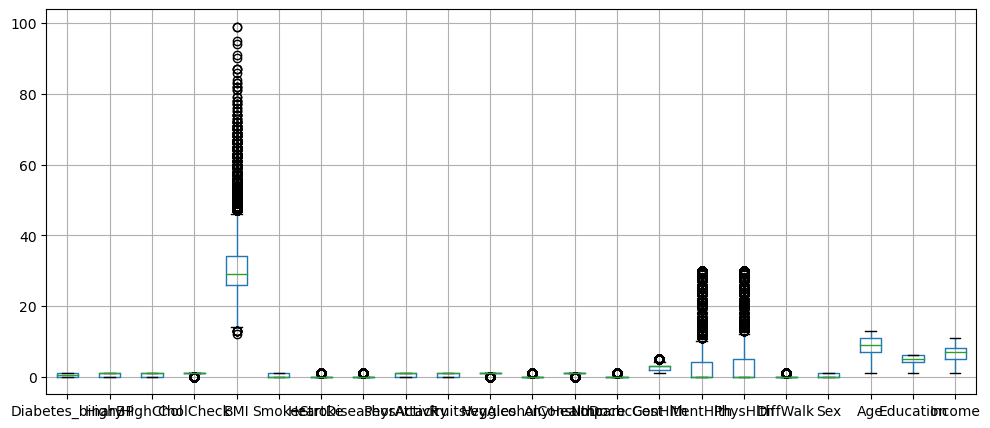

(67136, 22)

In [11]:
# Checking Outliers each Variables using Boxplot
plt.figure(figsize=(12, 5))
data.boxplot()
plt.show()
data.shape

In [12]:
# Removing Outlier (Using Zscore)
z_scores = zscore(data)
threshold = 3

outliers = np.abs(z_scores) > threshold
data = data[~outliers]
data.shape

(67136, 22)

**Drop NaN value**

In [13]:
# Check Missing Values
data.isnull().sum()

Diabetes_binary            0
HighBP                     0
HighChol                   0
CholCheck               1596
BMI                      805
Smoker                     0
Stroke                  3952
HeartDiseaseorAttack       0
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump       3297
AnyHealthcare           2198
NoDocbcCost             4466
GenHlth                    0
MentHlth                4118
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education               1143
Income                     0
dtype: int64

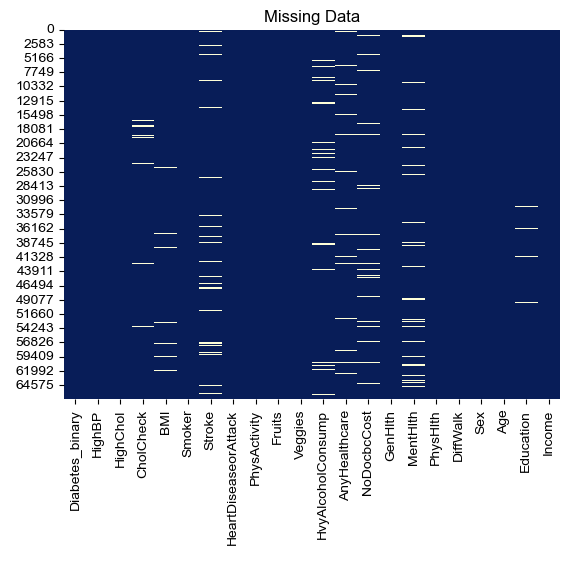

In [14]:
# Check Missing Values Heatnap
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

In [15]:
# Drop Missing Values
data = data.dropna()
data.shape

(50026, 22)

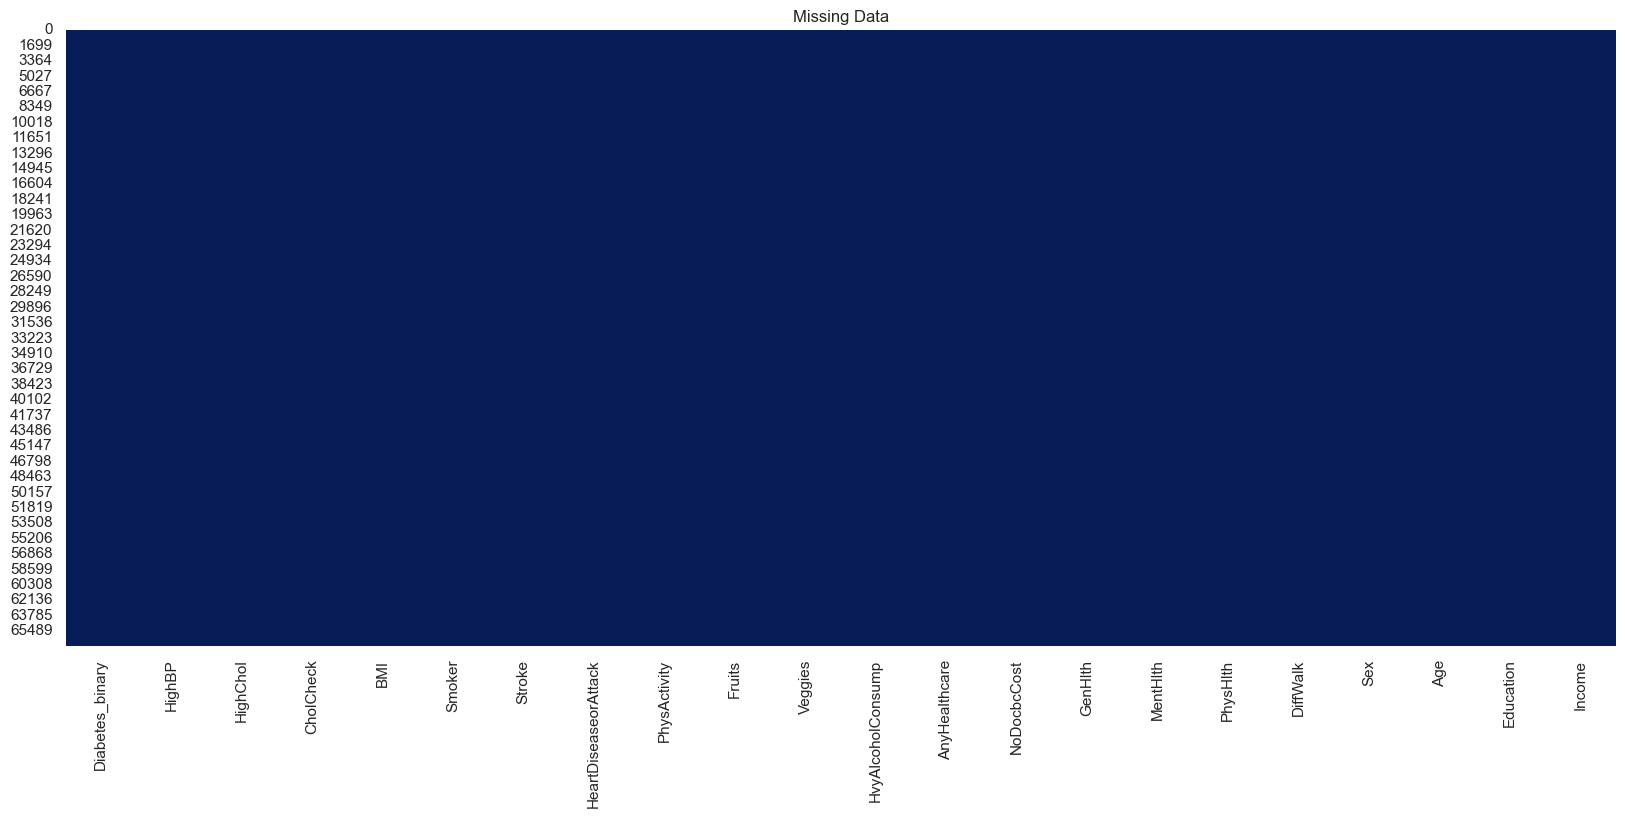

In [16]:
# Check Missing Values Heatnap
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

In [17]:
# To know & count each Target Variable Count Values
data['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    25300
1.0    24726
Name: count, dtype: int64

**Checking correlation of features again after pre-processing**

In [18]:
# Calculation
correlation_matrix = data.corr()

# Sorting & Display by Print
highest_corr_features = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

# Print title and the sorted correlation values
print("Correlation Analysis: Features Correlated with Diabetes Binary")
print(highest_corr_features)

Correlation Analysis: Features Correlated with Diabetes Binary
Diabetes_binary         1.000000
GenHlth                 0.380236
HighBP                  0.363499
Age                     0.291181
BMI                     0.277391
HighChol                0.258865
DiffWalk                0.225997
HeartDiseaseorAttack    0.186539
PhysHlth                0.160156
Smoker                  0.095073
Sex                     0.063352
MentHlth                0.009652
Fruits                 -0.047080
Veggies                -0.065335
Education              -0.133317
PhysActivity           -0.189081
Income                 -0.205493
CholCheck                    NaN
Stroke                       NaN
HvyAlcoholConsump            NaN
AnyHealthcare                NaN
NoDocbcCost                  NaN
Name: Diabetes_binary, dtype: float64


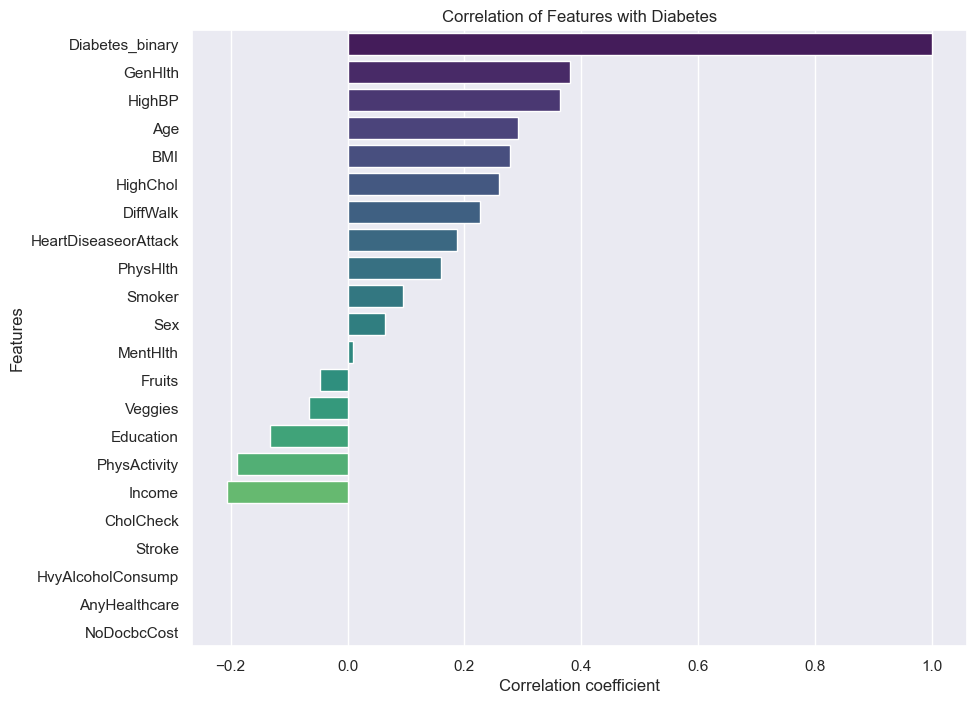

In [19]:
# Plotting Correlation of Features with Diabetes

plt.figure(figsize=(10, 8))
sns.barplot(x=highest_corr_features.values, y=highest_corr_features.index, palette="viridis")
plt.title('Correlation of Features with Diabetes')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

**Select features & target variables**

In [20]:
# Select features from top 10 corelation features, except HeartDiseaseorAttack
X = data[['GenHlth', 'HighBP', 'Age', 'BMI', 'HighChol', 
          'DiffWalk', 'PhysHlth', 'Smoker', 'Sex']]
y = data['Diabetes_binary']

**Make train test split dataset**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42)

print("Total sample at train data:", len(X_train))
print("Total sample at test data:", len(X_test))

Total sample at train data: 37519
Total sample at test data: 12507


## <div align="center"> [MODELING & EVALUATION]  </div>
---

### <div align="center"> Basic Random Forest </div>

In [22]:
rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [23]:
y_pred = rf_clf.predict(X_test)

**Evaluation**

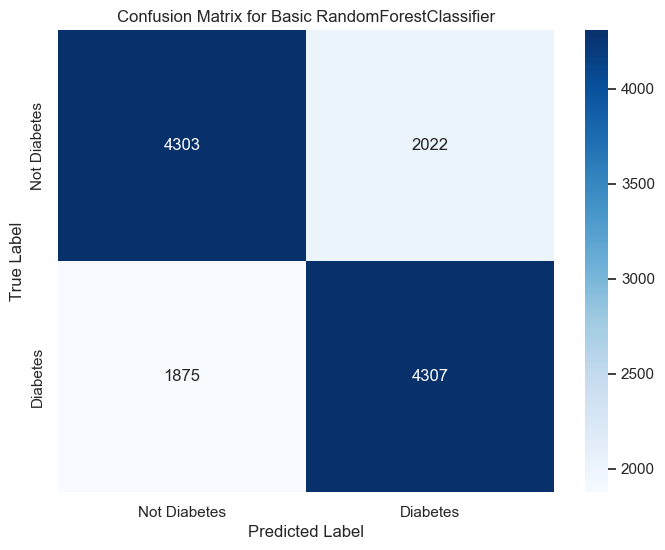

In [24]:
viz_cm = confusion_matrix(y_test, y_pred)
labels = ["Not Diabetes", "Diabetes"]
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Basic RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
print('\nClassification Report for Random Forest Algorithm:')
print('\n', classification_report(y_test, y_pred))


Classification Report for Random Forest Algorithm:

               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69      6325
         1.0       0.68      0.70      0.69      6182

    accuracy                           0.69     12507
   macro avg       0.69      0.69      0.69     12507
weighted avg       0.69      0.69      0.69     12507



In [26]:
print("Accuracy on training set : {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy on training set : 0.890
Accuracy on test set     : 0.688


### <div align="center"> Model RF 2 (cleaning with ENN) </div>

In [27]:
enn = EditedNearestNeighbours()

X_resampled, y_resampled = enn.fit_resample(X, y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, stratify=y_resampled, test_size=0.25, random_state=42)

print("Total sample at train data:", len(X_train))
print("Total sample at test data:", len(X_test))

Total sample at train data: 30160
Total sample at test data: 10054


In [29]:
rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [30]:
y_pred = rf_clf.predict(X_test)

**Evaluation**

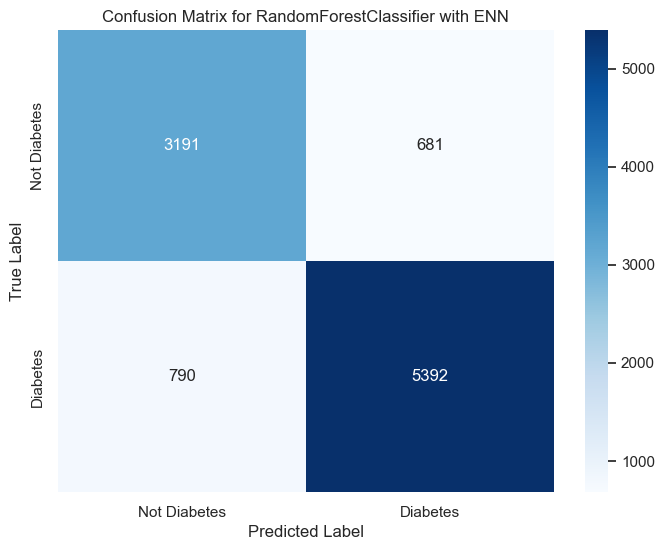

In [31]:
viz_cm = confusion_matrix(y_test, y_pred)
labels = ["Not Diabetes", "Diabetes"]
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for RandomForestClassifier with ENN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
print('\nClassification Report for Random Forest Algorithm with ENN:')
print('\n', classification_report(y_test, y_pred))


Classification Report for Random Forest Algorithm with ENN:

               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      3872
         1.0       0.89      0.87      0.88      6182

    accuracy                           0.85     10054
   macro avg       0.84      0.85      0.85     10054
weighted avg       0.85      0.85      0.85     10054



In [33]:
print("Accuracy on training set : {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy on training set : 0.946
Accuracy on test set     : 0.854


### <div align="center"> Model RF 2 (handle inbalance with SMOTEENN) </div>

In [34]:
resample = SMOTEENN()

X, y = resample.fit_resample(X_resampled, y_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [35]:
rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [36]:
y_pred = rf_clf.predict(X_test)

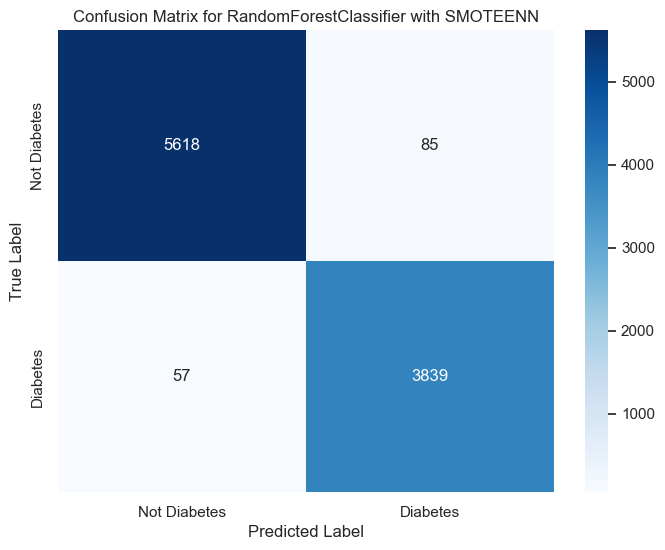

In [37]:
viz_cm = confusion_matrix(y_test, y_pred)
labels = ["Not Diabetes", "Diabetes"]
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for RandomForestClassifier with SMOTEENN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
print('\nClassification Report for Random Forest Algorithm with SMOTEENN:')
print('\n', classification_report(y_test, y_pred))


Classification Report for Random Forest Algorithm with SMOTEENN:

               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5703
         1.0       0.98      0.99      0.98      3896

    accuracy                           0.99      9599
   macro avg       0.98      0.99      0.98      9599
weighted avg       0.99      0.99      0.99      9599



In [39]:
print("Accuracy on training set : {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf_clf.score(X_test, y_test)))

Accuracy on training set : 1.000
Accuracy on test set     : 0.985


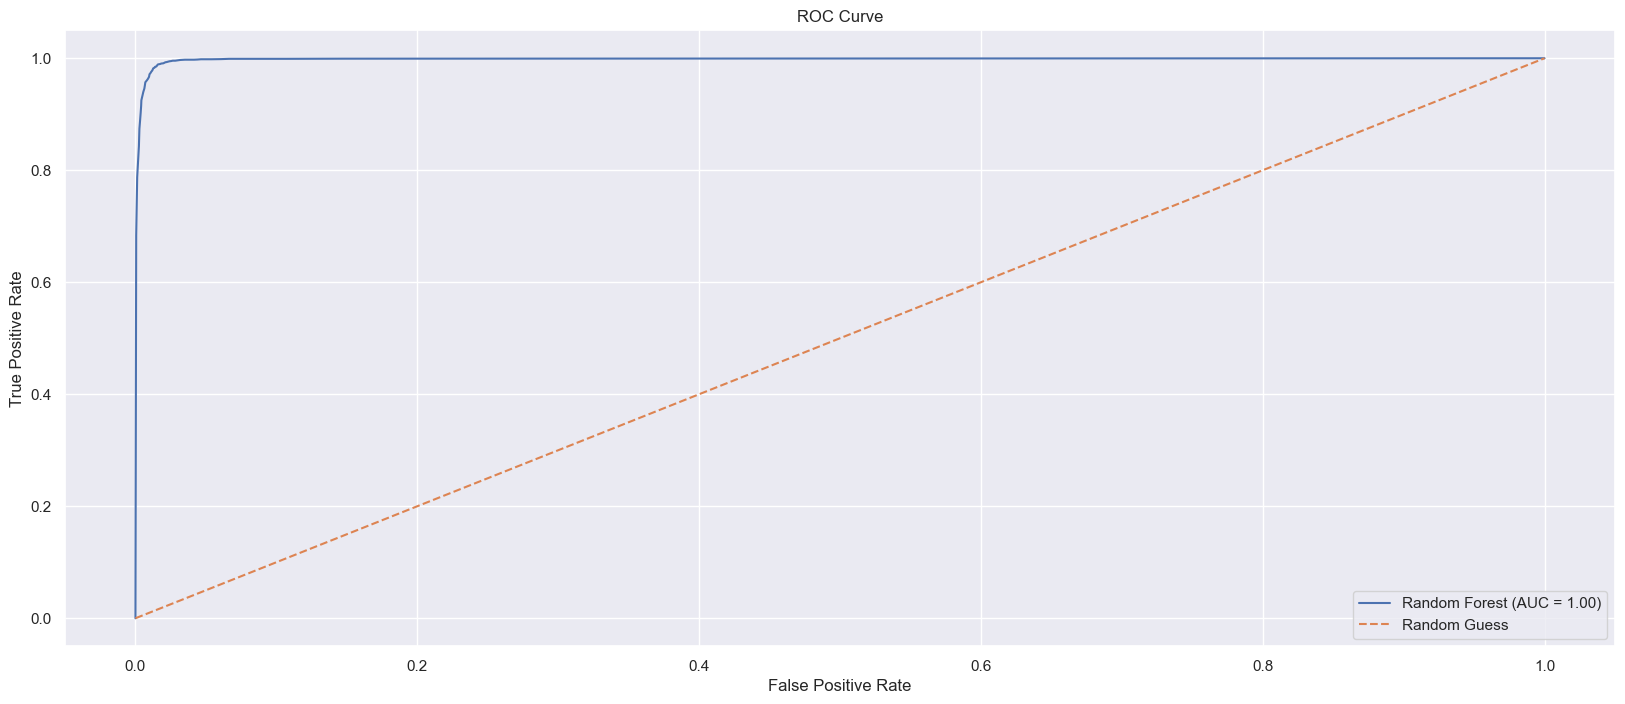

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Hitung AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## <div align="center"> [Comparing Data Actual with Data Predicted]  </div>
---

In [41]:
compare = pd.DataFrame()
for column in X_test.columns:
    compare[column] = X_test[column]

compare['Data Actual'] = y_test
compare['Predicted Diabetes'] = y_pred

mapping = {0: 'Not Diabetes', 1: 'Diabetes'}
compare['Data Actual'] = compare['Data Actual'].map(mapping)
compare['Predicted Diabetes'] = compare['Predicted Diabetes'].map(mapping)

compare_sample = compare.sample(n=10, random_state=42) 
compare_sample

,GenHlth,HighBP,Age,BMI,HighChol,DiffWalk,PhysHlth,Smoker,Sex,Data Actual,Predicted Diabetes
6358,2.0,1,4,24.0,1.0,0.0,0.0,1.0,1,Not Diabetes,Not Diabetes
27789,4.0,1,13,31.0,1.0,1.0,10.0,0.0,0,Diabetes,Diabetes
31786,3.0,1,11,38.0,1.0,0.0,0.0,1.0,1,Diabetes,Diabetes
10587,3.0,1,11,26.0,1.0,0.0,0.0,1.0,1,Not Diabetes,Not Diabetes
3839,1.0,0,4,27.0,0.0,0.0,0.0,1.0,0,Not Diabetes,Not Diabetes
24060,4.0,1,11,30.0,0.0,1.0,30.0,0.0,0,Diabetes,Diabetes
16753,3.0,0,10,21.0,1.0,0.0,0.0,0.0,0,Not Diabetes,Not Diabetes
34681,3.0,1,10,32.0,1.0,0.0,0.0,0.0,1,Diabetes,Diabetes
23825,4.0,0,13,32.0,0.0,1.0,0.0,0.0,0,Diabetes,Diabetes
6474,1.0,0,6,26.0,1.0,0.0,1.0,1.0,1,Not Diabetes,Not Diabetes


---
# <div align="center"> [New Query]  </div>
---

# A) EDA

In [42]:
nq_data = pd.read_csv('DataDiabetes.csv')
nq_data.head()

,DIABETES\nApakah Anda memiliki Diabetes atau Tidak?\n[ 0 = Tidak Memiliki Diabetes | 1 = Diabetes ],"UMUR\nTerdapat total 13 level Golongan kategori usia, Anda termasuk Golongan?\n• Golongan 1 : 18-24 tahun\n• Golongan 2 : 25-29 tahun\n• Golongan 3 : 30-34 tahun\n• Golongan 4 : 35-39 tahun\n• Golongan 5 : 40-44 tahun\n• Golongan 6 : 45-49 tahun\n• Golongan 7 : 50-54 tahun\n• Golongan 8 : 55-59 tahun\n• Golongan 9 : 60-64 tahun\n• Golongan 10: 65-69 tahun\n• Golongan 11: 70-74 tahun\n• Golongan 12: 75-79 tahun\n• Golongan 13: 80≥ tahun",JENIS KELAMIN\nApa Jenis Kelamin anda?\n[ 0 = Laki - Laki | 1 = Perempuan ],SMOKER\nStatus merokok Anda. Pernahkah Anda merokok setidaknya 100 batang rokok sepanjang hidup Anda? (Catatan: 5 bungkus = 100 batang rokok)\n[ 0 = Tidak | 1 = Iya ],KESULITAN BERJALAN\nApakah individu memiliki kesulitan serius dalam berjalan atau naik tangga?\n[ 0 = Tidak | 1 = Iya ],TEKANAN DARAH\nStatus tekanan darah tinggi Anda?\n[ 0 = Tidak Memiliki Riwayat Darah Tinggi | 1 = Tekanan Darah Tinggi ],CHOLESTEROL\nStatus Kolesterol Individu\n[ 0 = Kolesterol Tidak Tinggi | 1 = Kolesterol Tinggi ],BERAT BADAN\nBerapa berat badan (BB) anda?,TINGGI BADAN\nBerapa tinggi badan (TB) anda?,"KESEHATAN FISIK \nBerapa hari selama 30 hari terakhir Anda mengalami masalah kesehatan fisik, termasuk penyakit fisik dan cedera?\n[ Contoh : Selama sebulan, total tidak enak badan 3 hari, maka tulis '3'. Apabila merasa sehat saja, maka tulis '0' ]","KESEHATAN UMUM\nStatus kesehatan umum yang dilaporkan. Menurut Anda, secara umum kesehatan Anda (Skala 1-5) ?\n• 1 = Sangat Baik\n• 2 = Baik Sekali\n• 3 = Baik\n• 4 = Kurang Baik\n• 5 = Sangat Buruk"
0,0,1,1,1,0,0,0,60.0,160,2,2
1,0,5,1,0,0,0,0,72.0,158,0,3
2,0,6,1,0,0,0,0,75.0,158,0,1
3,0,5,1,0,0,0,0,80.0,163,0,3
4,0,4,1,0,0,0,0,68.0,158,0,2


In [43]:
nq_data.rename(columns=lambda x: x.split('\n')[0], inplace=True)
nq_data.dropna(inplace=True)
nq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DIABETES            82 non-null     int64  
 1   UMUR                82 non-null     int64  
 2   JENIS KELAMIN       82 non-null     int64  
 3   SMOKER              82 non-null     int64  
 4   KESULITAN BERJALAN  82 non-null     int64  
 5   TEKANAN DARAH       82 non-null     int64  
 6   CHOLESTEROL         82 non-null     int64  
 7   BERAT BADAN         82 non-null     float64
 8   TINGGI BADAN        82 non-null     int64  
 9   KESEHATAN FISIK     82 non-null     int64  
 10  KESEHATAN UMUM      82 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 7.2 KB


In [44]:
nq_data

,DIABETES,UMUR,JENIS KELAMIN,SMOKER,KESULITAN BERJALAN,TEKANAN DARAH,CHOLESTEROL,BERAT BADAN,TINGGI BADAN,KESEHATAN FISIK,KESEHATAN UMUM
0,0,1,1,1,0,0,0,60.0,160,2,2
1,0,5,1,0,0,0,0,72.0,158,0,3
2,0,6,1,0,0,0,0,75.0,158,0,1
3,0,5,1,0,0,0,0,80.0,163,0,3
4,0,4,1,0,0,0,0,68.0,158,0,2
...,...,...,...,...,...,...,...,...,...,...,...
77,0,1,0,1,0,0,0,58.0,168,0,3
78,1,4,0,1,1,0,0,121.0,169,30,4
79,1,5,1,1,0,0,1,73.0,155,3,4
80,1,4,0,1,0,0,1,98.0,168,1,4


## VISUALIZATION

### 1) PIE CHART

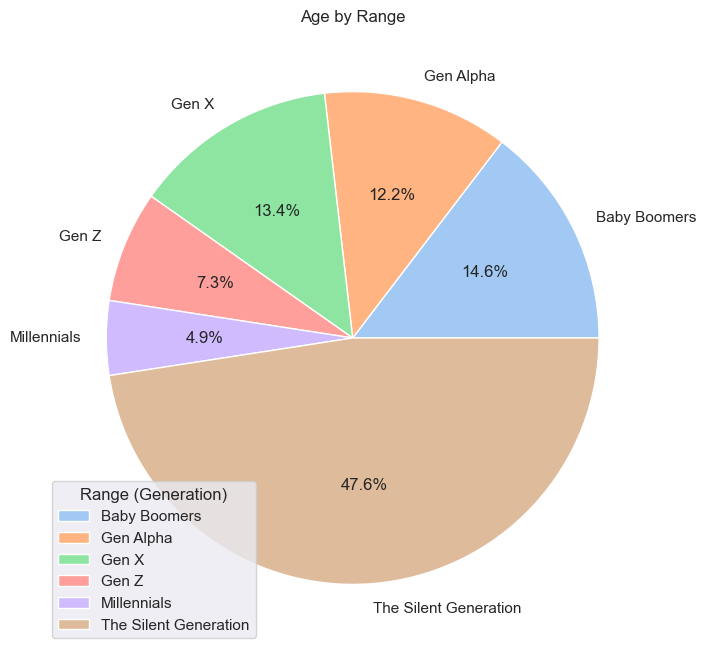

In [45]:
# Mapping golongan usia ke generasi
generation_mapping = {
    1: 'Gen Alpha',
    2: 'Gen Z',
    3: 'Millennials',
    4: 'Gen X',
    5: 'Baby Boomers',
    6: 'The Silent Generation',
    7: 'The Silent Generation',
    8: 'The Silent Generation',
    9: 'The Silent Generation',
    10: 'The Silent Generation',
    11: 'The Silent Generation',
    12: 'The Silent Generation',
    13: 'The Silent Generation'
}

# Menerapkan mapping ke dalam data
nq_data['GENERATION'] = nq_data['UMUR'].map(generation_mapping)

# Pie chart
GENERATION_PIE = nq_data.groupby('GENERATION').size()

# Plot
GENERATION_PIE.plot.pie(subplots=True, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age by Range')
plt.legend(GENERATION_PIE.index, loc="lower left", title='Range (Generation)')
plt.show()

In [46]:
nq_data

,DIABETES,UMUR,JENIS KELAMIN,SMOKER,KESULITAN BERJALAN,TEKANAN DARAH,CHOLESTEROL,BERAT BADAN,TINGGI BADAN,KESEHATAN FISIK,KESEHATAN UMUM,GENERATION
0,0,1,1,1,0,0,0,60.0,160,2,2,Gen Alpha
1,0,5,1,0,0,0,0,72.0,158,0,3,Baby Boomers
2,0,6,1,0,0,0,0,75.0,158,0,1,The Silent Generation
3,0,5,1,0,0,0,0,80.0,163,0,3,Baby Boomers
4,0,4,1,0,0,0,0,68.0,158,0,2,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,1,0,1,0,0,0,58.0,168,0,3,Gen Alpha
78,1,4,0,1,1,0,0,121.0,169,30,4,Gen X
79,1,5,1,1,0,0,1,73.0,155,3,4,Baby Boomers
80,1,4,0,1,0,0,1,98.0,168,1,4,Gen X


### 2) BARCHART

In [47]:
# DIABETES
nq_data['Diabetes'] = np.where(nq_data['DIABETES'] == 0, 'Tidak Memiliki Diabetes', 'Diabetes')

# UMUR
nq_data['Golongan Umur'] = np.where(
    nq_data['UMUR'] == 1 , 'Golongan 1: 18-24 tahun',
    np.where(nq_data['UMUR'] == 2, 'Golongan 2: 25-29 tahun',
             np.where(nq_data['UMUR'] == 3, 'Golongan 3: 30-34 tahun',
                      np.where(nq_data['UMUR'] == 4, 'Golongan 4: 35-39 tahun',
                               np.where(nq_data['UMUR'] == 5, 'Golongan 5: 40-44 tahun',
                                        np.where(nq_data['UMUR'] == 6, 'Golongan 6: 45-49 tahun',
                                                 np.where(nq_data['UMUR'] == 7, 'Golongan 7: 50-54 tahun',
                                                          np.where(nq_data['UMUR'] == 8, 'Golongan 8: 55-59 tahun',
                                                                   np.where(nq_data['UMUR'] == 9, 'Golongan 9: 60-64 tahun',
                                                                            np.where(nq_data['UMUR'] == 10, 'Golongan 10: 65-69 tahun',
                                                                                     np.where(nq_data['UMUR'] == 11, 'Golongan 11: 70-74 tahun',
                                                                                              np.where(nq_data['UMUR'] == 12, 'Golongan 12: 75-79 tahun',
                                                                                                       'Golongan 13: 80≥ tahun'))))))))))))
# JENIS KELAMIN
nq_data['Jenis Kelamin'] = np.where(nq_data['JENIS KELAMIN'] == 0, 'Laki - Laki', 'Perempuan')

# SMOKER
nq_data['Smoker'] = np.where(nq_data['SMOKER'] == 0, 'Tidak', 'Iya')

# KESULITAN BERJALAN
nq_data['Kesulitan Berjalan'] = np.where(nq_data['KESULITAN BERJALAN'] == 0, 'Tidak', 'Iya')

# TEKANAN DARAH
nq_data['Tekanan Darah'] = np.where(nq_data['TEKANAN DARAH'] == 0, 'Tidak Memiliki Riwayat Darah Tinggi', 'Tekanan Darah Tinggi')

# CHOLESTEROL
nq_data['Kolestrol'] = np.where(nq_data['CHOLESTEROL'] == 0, 'Kolesterol Tidak Tinggi', 'Kolesterol Tinggi')

# RENAME COLUMN
data.rename(columns={'Berat Badan': 'BERAT BADAN'}, inplace=True)
data.rename(columns={'Tinggi Badan': 'TINGGI BADAN'}, inplace=True)
data.rename(columns={'Kesehatan Fisik': 'KESEHATAN FISIK'}, inplace=True)
data.rename(columns={'Kesehatan Umum': 'KESEHATAN UMUM'}, inplace=True)

# Menampilkan tabel
nq_data

,DIABETES,UMUR,JENIS KELAMIN,SMOKER,KESULITAN BERJALAN,TEKANAN DARAH,CHOLESTEROL,BERAT BADAN,TINGGI BADAN,KESEHATAN FISIK,KESEHATAN UMUM,GENERATION,Diabetes,Golongan Umur,Jenis Kelamin,Smoker,Kesulitan Berjalan,Tekanan Darah,Kolestrol
0,0,1,1,1,0,0,0,60.0,160,2,2,Gen Alpha,Tidak Memiliki Diabetes,Golongan 1: 18-24 tahun,Perempuan,Iya,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
1,0,5,1,0,0,0,0,72.0,158,0,3,Baby Boomers,Tidak Memiliki Diabetes,Golongan 5: 40-44 tahun,Perempuan,Tidak,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
2,0,6,1,0,0,0,0,75.0,158,0,1,The Silent Generation,Tidak Memiliki Diabetes,Golongan 6: 45-49 tahun,Perempuan,Tidak,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
3,0,5,1,0,0,0,0,80.0,163,0,3,Baby Boomers,Tidak Memiliki Diabetes,Golongan 5: 40-44 tahun,Perempuan,Tidak,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
4,0,4,1,0,0,0,0,68.0,158,0,2,Gen X,Tidak Memiliki Diabetes,Golongan 4: 35-39 tahun,Perempuan,Tidak,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,1,0,1,0,0,0,58.0,168,0,3,Gen Alpha,Tidak Memiliki Diabetes,Golongan 1: 18-24 tahun,Laki - Laki,Iya,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
78,1,4,0,1,1,0,0,121.0,169,30,4,Gen X,Diabetes,Golongan 4: 35-39 tahun,Laki - Laki,Iya,Iya,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tidak Tinggi
79,1,5,1,1,0,0,1,73.0,155,3,4,Baby Boomers,Diabetes,Golongan 5: 40-44 tahun,Perempuan,Iya,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tinggi
80,1,4,0,1,0,0,1,98.0,168,1,4,Gen X,Diabetes,Golongan 4: 35-39 tahun,Laki - Laki,Iya,Tidak,Tidak Memiliki Riwayat Darah Tinggi,Kolesterol Tinggi


<Figure size 1200x800 with 0 Axes>

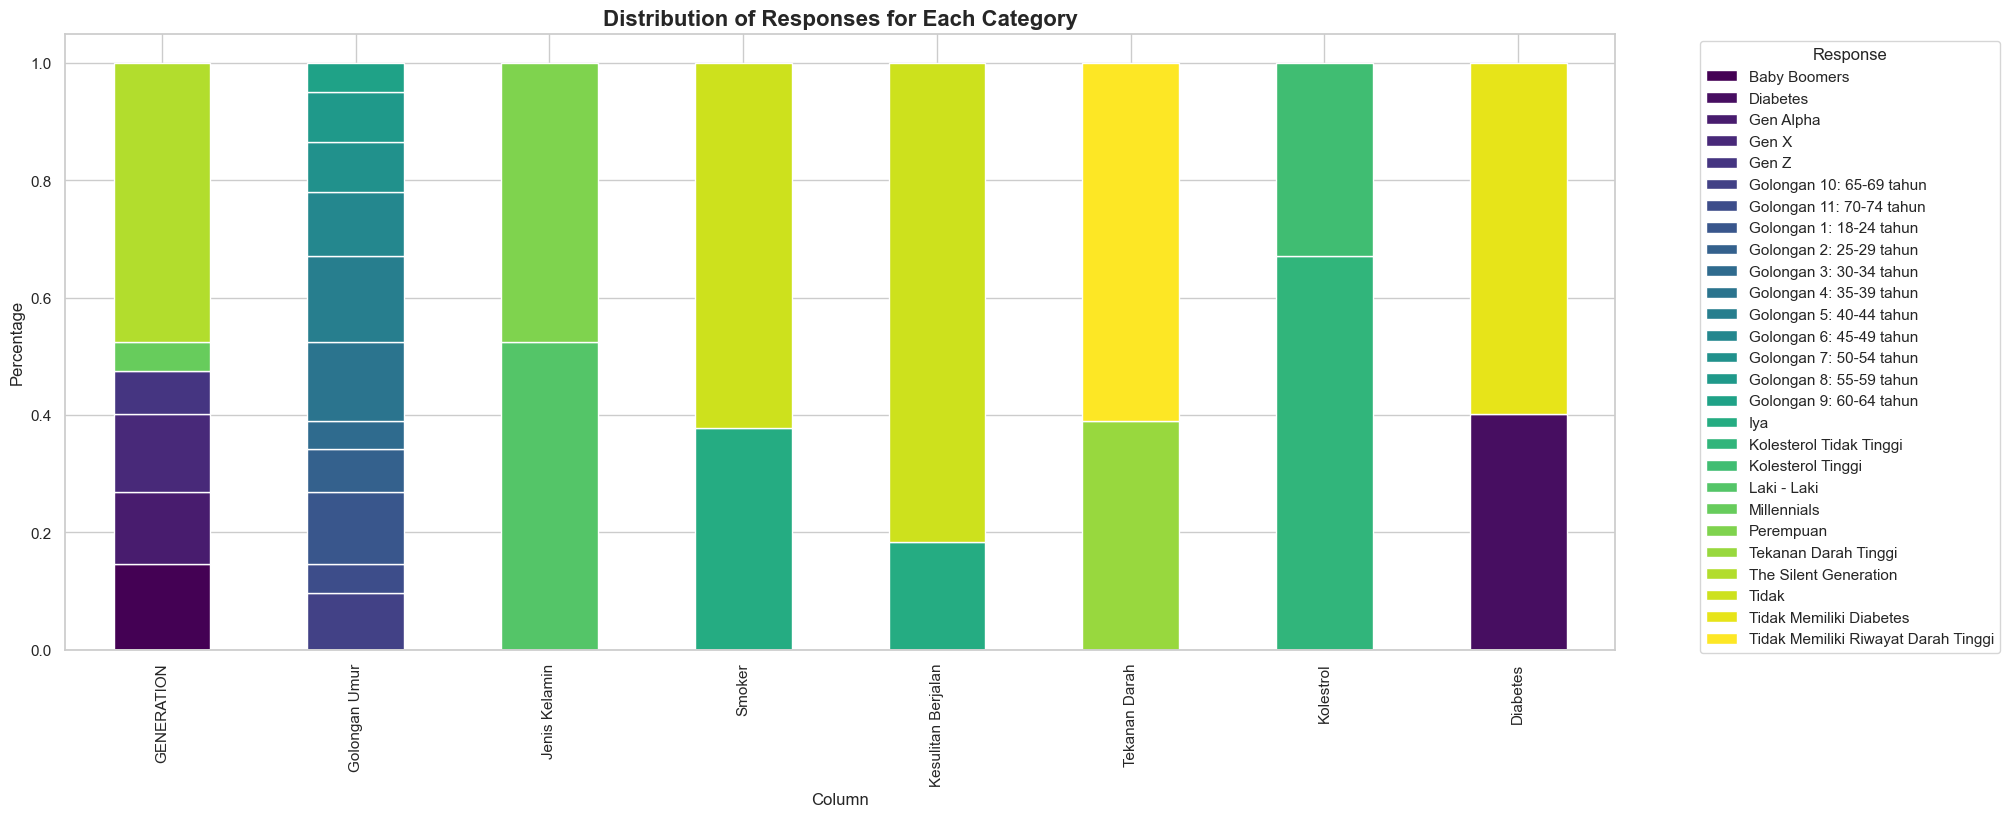

In [48]:
# Extract the desired columns by providing a list of column names
my_data_crea = nq_data[['GENERATION', 'Golongan Umur', 'Jenis Kelamin', 'Smoker', 'Kesulitan Berjalan', 'Tekanan Darah', 'Kolestrol', 'Diabetes']]

# Set the style of the visualization
sns.set(style="whitegrid")

# Calculate the percentage distribution of responses for each category
visualization_data = my_data_crea.apply(lambda x: pd.Series(x.value_counts(normalize=True))).T

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
ax = visualization_data.plot(kind="bar", stacked=True, colormap="viridis")

# Customize the plot
plt.title("Distribution of Responses for Each Category", fontweight='bold', fontsize=16)  # Make title bold and larger
plt.xlabel("Column")
plt.ylabel("Percentage")
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# B) Data Preparation

In [49]:
# Drop Kolom yang tidak diperlukan
# Drop the specified columns
nq_data = nq_data.drop(['GENERATION', 'Diabetes', 'Golongan Umur', 'Jenis Kelamin', 'Smoker', 'Kesulitan Berjalan', 'Tekanan Darah', 'Kolestrol'], axis=1)
nq_data

,DIABETES,UMUR,JENIS KELAMIN,SMOKER,KESULITAN BERJALAN,TEKANAN DARAH,CHOLESTEROL,BERAT BADAN,TINGGI BADAN,KESEHATAN FISIK,KESEHATAN UMUM
0,0,1,1,1,0,0,0,60.0,160,2,2
1,0,5,1,0,0,0,0,72.0,158,0,3
2,0,6,1,0,0,0,0,75.0,158,0,1
3,0,5,1,0,0,0,0,80.0,163,0,3
4,0,4,1,0,0,0,0,68.0,158,0,2
...,...,...,...,...,...,...,...,...,...,...,...
77,0,1,0,1,0,0,0,58.0,168,0,3
78,1,4,0,1,1,0,0,121.0,169,30,4
79,1,5,1,1,0,0,1,73.0,155,3,4
80,1,4,0,1,0,0,1,98.0,168,1,4


In [50]:
# Hitung BMI
nq_data['BMI'] = nq_data['BERAT BADAN'] / ((nq_data['TINGGI BADAN'] / 100) ** 2)
nq_data.head()

,DIABETES,UMUR,JENIS KELAMIN,SMOKER,KESULITAN BERJALAN,TEKANAN DARAH,CHOLESTEROL,BERAT BADAN,TINGGI BADAN,KESEHATAN FISIK,KESEHATAN UMUM,BMI
0,0,1,1,1,0,0,0,60.0,160,2,2,23.437500
1,0,5,1,0,0,0,0,72.0,158,0,3,28.841532
2,0,6,1,0,0,0,0,75.0,158,0,1,30.043262
3,0,5,1,0,0,0,0,80.0,163,0,3,30.110279
4,0,4,1,0,0,0,0,68.0,158,0,2,27.239224


In [51]:
mapping = {
    'DIABETES': 'Diabetes_binary',           
    'KESEHATAN UMUM': 'GenHlth',
    'TEKANAN DARAH': 'HighBP',
    'UMUR': 'Age',
    'CHOLESTEROL': 'HighChol',
    'KESULITAN BERJALAN': 'DiffWalk',
    'KESEHATAN FISIK ': 'PhysHlth',
    'SMOKER': 'Smoker',
    'JENIS KELAMIN': 'Sex'
}

nq_data.rename(columns=mapping, inplace=True)
nq_data.head()

,Diabetes_binary,Age,Sex,Smoker,DiffWalk,HighBP,HighChol,BERAT BADAN,TINGGI BADAN,PhysHlth,GenHlth,BMI
0,0,1,1,1,0,0,0,60.0,160,2,2,23.437500
1,0,5,1,0,0,0,0,72.0,158,0,3,28.841532
2,0,6,1,0,0,0,0,75.0,158,0,1,30.043262
3,0,5,1,0,0,0,0,80.0,163,0,3,30.110279
4,0,4,1,0,0,0,0,68.0,158,0,2,27.239224


# C) MODELING

In [52]:
X_nq = nq_data[['GenHlth', 'HighBP', 'Age', 'BMI', 'HighChol', 'DiffWalk', 'PhysHlth', 'Smoker', 'Sex']]
y_nq = nq_data['Diabetes_binary']
y_pred_nq = rf_clf.predict(X_nq)

# D) EVALUATION

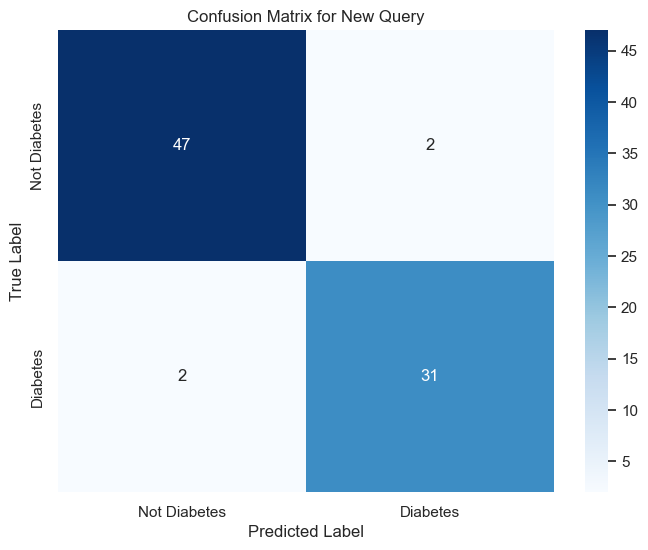

In [53]:
viz_cm = confusion_matrix(y_nq, y_pred_nq)
labels = ["Not Diabetes", "Diabetes"]
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for New Query')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
print('\nClassification Report for New Query:')
print('\n', classification_report(y_nq, y_pred_nq))


Classification Report for New Query:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.94      0.94      0.94        33

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [55]:
test = pd.DataFrame(X_nq, columns=['GenHlth', 'HighBP', 'Age', 'BMI', 'HighChol', 'DiffWalk', 'PhysHlth', 'Smoker', 'Sex'])

test['Actual'] = y_nq
test['Predicted'] = y_pred_nq

mapping = {0: 'Not Diabetes', 1: 'Diabetes'}
test['Actual'] = test['Actual'].map(mapping)
test['Predicted'] = test['Predicted'].map(mapping)

sampled_test = test.sample(n=10, random_state=42)
sampled_test

,GenHlth,HighBP,Age,BMI,HighChol,DiffWalk,PhysHlth,Smoker,Sex,Actual,Predicted
30,2,1,9,33.090422,0,0,0,0,1,Not Diabetes,Not Diabetes
0,2,0,1,23.437500,0,0,2,1,1,Not Diabetes,Not Diabetes
22,3,1,4,33.747704,1,1,1,0,0,Diabetes,Diabetes
31,4,1,6,21.501886,0,0,15,1,1,Diabetes,Diabetes
18,3,1,7,40.269560,0,1,2,1,0,Diabetes,Diabetes
28,2,0,2,22.386314,0,0,0,0,0,Not Diabetes,Not Diabetes
10,2,0,1,20.957171,0,0,2,1,1,Not Diabetes,Not Diabetes
53,2,0,7,22.790358,0,0,0,0,1,Not Diabetes,Not Diabetes
4,2,0,4,27.239224,0,0,0,0,1,Not Diabetes,Not Diabetes
12,2,1,1,18.590125,0,0,1,0,1,Not Diabetes,Not Diabetes


In [56]:
test_diff = test[test['Actual'] != test['Predicted']]
test_diff

,GenHlth,HighBP,Age,BMI,HighChol,DiffWalk,PhysHlth,Smoker,Sex,Actual,Predicted
13,3,1,5,31.141869,1,0,4,1,0,Not Diabetes,Diabetes
20,3,1,5,22.343516,1,0,2,0,0,Diabetes,Not Diabetes
27,3,0,6,24.913495,1,0,0,1,0,Diabetes,Not Diabetes
69,2,1,8,452.777778,0,0,4,1,0,Not Diabetes,Diabetes


***

### Save the notebook, then convert the notebook to html (by running the next code).

!jupyter nbconvert --to html "./IF540_BL_FinalProject_Group1-DraftBeforeMidterm" --output-dir="./"